# Exploratory Data Analysis

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

import pandas as pd
import nltk

In [2]:
video_data = pd.read_csv("dataset/USvideos.csv")
video_data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


## Simple Decision Tree model

In [3]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [4]:
df = video_data

# title to lowercase
df['title'] = df['title'].apply(lambda x: x.lower())

# title to plain text, no punc
df['title'] = df['title'].str.replace(r'[^\w\s]', '')

# split data to train and test set
X_train, X_test, y_train, y_test = train_test_split(df['title'], 
                                                    df['category_id'], 
                                                    test_size=0.25, 
                                                    shuffle=True
                                                   )

# fit tfidf and transform X training and X testing
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(X_train)
y = y_train

# decition tree model
dt = DecisionTreeClassifier()
dt.fit(X, y)

# forecast
y_pred = dt.predict(tfidf.transform(X_test))

# accuracy score
print("accuracy score:", metrics.accuracy_score(y_test, y_pred))

# 5 fold cross validation
cv = cross_validate(dt, X, y, cv=5)
cv['test_score']

accuracy score: 0.9824184411017777


array([0.97316637, 0.97901415, 0.97834582, 0.97588398, 0.97408735])

## Sentiment Analysis

In [5]:
df2 = video_data[['likes', 
                  'dislikes', 
                  'comment_count', 
                  'comments_disabled', 
                  'ratings_disabled', 
                  'video_error_or_removed']
                ]

# import vader_lexicon for text polarity data
print(''.join(open("vader_lexicon.txt").readlines()[:10]))
sent = pd.read_csv('vader_lexicon.txt', 
                   sep='\t',
                   usecols=[0, 1], 
                   header=None, 
                   names=['token', 'polarity'],
                   index_col='token'
                  )
sent.head()

$:	-1.5	0.80623	[-1, -1, -1, -1, -3, -1, -3, -1, -2, -1]
%)	-0.4	1.0198	[-1, 0, -1, 0, 0, -2, -1, 2, -1, 0]
%-)	-1.5	1.43178	[-2, 0, -2, -2, -1, 2, -2, -3, -2, -3]
&-:	-0.4	1.42829	[-3, -1, 0, 0, -1, -1, -1, 2, -1, 2]
&:	-0.7	0.64031	[0, -1, -1, -1, 1, -1, -1, -1, -1, -1]
( '}{' )	1.6	0.66332	[1, 2, 2, 1, 1, 2, 2, 1, 3, 1]
(%	-0.9	0.9434	[0, 0, 1, -1, -1, -1, -2, -2, -1, -2]
('-:	2.2	1.16619	[4, 1, 4, 3, 1, 2, 3, 1, 2, 1]
(':	2.3	0.9	[1, 3, 3, 2, 2, 4, 2, 3, 1, 2]
((-:	2.1	0.53852	[2, 2, 2, 1, 2, 3, 2, 2, 3, 2]



,polarity
token,
$:,-1.5
%),-0.4
%-),-1.5
&-:,-0.4
&:,-0.7


In [6]:
# X train to tidy format
X_train_df = X_train.to_frame()
tidy_format = (
    X_train_df['title']
    .str.split(expand=True)
    .stack()
    .reset_index(level=1)
    .rename(columns={'level_1': 'num', 0: 'word'})
)
tidy_format.head()

,num,word
34739,0,real
34739,1,doctor
34739,2,reacts
34739,3,to
34739,4,the


In [7]:
# sum of the polarity of each title
X_train_df['polarity'] = (
    tidy_format
    .merge(sent, how='left', left_on='word', right_index=True)
    .reset_index()
    .loc[:, ['index', 'polarity']]
    .groupby('index')
    .sum()
    .fillna(0)
)
X_train_df.head()

,title,polarity
34739,real doctor reacts to the good doctor medical...,1.9
10581,what if 2017 never happened chris and brittany,0.0
28280,5 seconds of summer want you back official video,0.3
16702,makeover on my mom patrickstarrr,0.0
6981,highlights mk dons u18s 10 cardiff city u18s,0.0


In [8]:
# positive/negative polarity data frame
pos = X_train_df[X_train_df['polarity']>0]
positive = pos.join(df2, on=pos.index)
neg = X_train_df[X_train_df['polarity']<0]
negative = neg.join(df2, on=neg.index)
print("positive polarity:")
display(positive.head())
print("negative polarity:")
display(negative.head())

# positive polarity data description
pos_desc = positive.likes.describe().astype(int).to_frame()
pos_desc = pd.concat([pos_desc, positive.comment_count.describe().astype(int).to_frame()], axis = 1)
pos_desc = pd.concat([pos_desc, positive.dislikes.describe().astype(int).to_frame()], axis = 1)
print("positive polarity data description:")
display(pos_desc)

# negative polarity data description
neg_desc = negative.likes.describe().astype(int).to_frame()
neg_desc = pd.concat([neg_desc, negative.comment_count.describe().astype(int).to_frame()], axis = 1)
neg_desc = pd.concat([neg_desc, negative.dislikes.describe().astype(int).to_frame()], axis = 1)
print("negative polarity data description:")
display(neg_desc)

positive polarity:


,title,polarity,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
34739,real doctor reacts to the good doctor medical...,1.9,205591,2198,24271,False,False,False
28280,5 seconds of summer want you back official video,0.3,341063,3079,26024,False,False,False
6774,welcome to the official class of 2018 inductees,2.0,192,26,104,False,False,False
6726,all time greatest airplane seat emirates firs...,3.2,240179,5882,12928,False,False,False
2230,demi lovato sorry not sorry live from the 201...,1.4,127779,1705,8551,False,False,False


negative polarity:


,title,polarity,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
7564,kane brown setting the night on fire,-1.4,8091,279,299,False,False,False
14709,exus gymnastics doctor sentenced for dozens of...,-2.6,18,5,10,False,False,False
31320,garry franks weather rant 41018,-1.4,17336,512,2021,False,False,False
32306,13 clever ways to fake highend looks in your home,-0.1,74835,5169,2697,False,False,False
862,the problem with lab mice,-1.7,22854,2983,2902,False,False,False


positive polarity data description:


,likes,comment_count,dislikes
count,8221,8221,8221
mean,79492,8421,2751
std,271311,45805,10676
min,0,0,0
25%,5263,562,186
50%,17230,1629,560
75%,50860,5102,1661
max,5613827,1228655,206892


negative polarity data description:


,likes,comment_count,dislikes
count,6020,6020,6020
mean,91267,11930,5781
std,324668,55722,48482
min,0,0,0
25%,5247,763,252
50%,17502,2198,760
75%,56056,6549,2325
max,5023450,1361580,1674420


In [9]:
# sort the highest polarity videos
positive.sort_values('polarity', ascending=False).head(10)

,title,polarity,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
18913,the best love advice i can give real adult rel...,9.6,8671,260,319,False,False,False
53,jennifer lopez amor amor amor official video ...,9.0,190083,15015,11473,False,False,False
783,jennifer lopez amor amor amor official video ...,9.0,248909,21039,13058,False,False,False
310,jennifer lopez amor amor amor official video ...,9.0,216319,17751,12133,False,False,False
11099,indian street food tour deep in punjab india ...,8.7,24216,745,5359,False,False,False
10423,indian street food tour deep in punjab india ...,8.7,18504,537,4364,False,False,False
10869,indian street food tour deep in punjab india ...,8.7,22893,701,5207,False,False,False
10210,indian street food tour deep in punjab india ...,8.7,12512,273,3385,False,False,False
10649,indian street food tour deep in punjab india ...,8.7,20786,629,4894,False,False,False
11332,indian street food tour deep in punjab india ...,8.7,25277,798,5498,False,False,False


In [10]:
# sort the highest polarity videos, remove duplicate
round(positive.groupby('title').mean(), 2).sort_values('polarity', ascending=False).iloc[:10].reset_index()

,title,polarity,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,the best love advice i can give real adult rel...,9.6,8671.00,260.00,319.00,0.0,0.0,0.0
1,jennifer lopez amor amor amor official video ...,9.0,218437.00,17935.00,12221.33,0.0,0.0,0.0
2,indian street food tour deep in punjab india ...,8.7,20698.00,613.83,4784.50,0.0,0.0,0.0
3,stefon diggs makes miracle td catch on last pl...,8.4,30043.75,1745.75,10988.25,0.0,0.0,0.0
4,the great festive bake off does stay another d...,8.2,189.33,5.00,15.00,0.0,0.0,0.0
5,i made him fabulous best friend makeover chal...,8.1,34833.80,465.40,3091.20,0.0,0.0,0.0
6,kendrick lamar and rihanna win best rapsung pe...,8.0,163.00,30.00,50.00,0.0,0.0,0.0
7,philadelphia eagles super bowl parade 2018 mvp...,7.5,1003.80,62.80,71.60,0.0,0.0,0.0
8,indian street food of your dreams in kolkata i...,7.2,14360.00,544.67,3859.00,0.0,0.0,0.0
9,daniel kaluuya wins the ee rising star award ...,7.2,566.40,9.00,57.80,0.0,0.0,0.0


In [11]:
# sort the lowest polarity videos
negative.sort_values('polarity').head(10)

,title,polarity,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
13882,film theory how star wars theories killed star...,-8.7,126409,12101,37592,False,False,False
13648,film theory how star wars theories killed star...,-8.7,123958,11799,36937,False,False,False
14121,film theory how star wars theories killed star...,-8.7,127963,12289,38105,False,False,False
13202,film theory how star wars theories killed star...,-8.7,110660,9917,33721,False,False,False
32234,former police officer is suspected golden stat...,-8.1,3746,214,2244,False,False,False
31574,former police officer is suspected golden stat...,-8.1,3525,193,2081,False,False,False
34885,former police officer is suspected golden stat...,-8.1,3789,220,2275,False,False,False
32014,former police officer is suspected golden stat...,-8.1,3744,214,2242,False,False,False
33080,former police officer is suspected golden stat...,-8.1,3744,215,2242,False,False,False
32661,former police officer is suspected golden stat...,-8.1,3747,215,2240,False,False,False


In [12]:
# sort the lowest polarity videos, remove duplicate
round(negative.groupby('title').mean(), 2).sort_values('polarity').iloc[:10].reset_index()

,title,polarity,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,film theory how star wars theories killed star...,-8.7,122247.50,11526.50,36588.75,0.0,0.0,0.0
1,former police officer is suspected golden stat...,-8.1,3715.83,211.83,2220.67,0.0,0.0,0.0
2,i have taken poison claims war criminal,-7.8,1996.88,751.38,336.50,0.0,0.0,0.0
3,arrested development star wars with ron howard...,-7.3,17255.67,237.17,887.83,0.0,0.0,0.0
4,this has to stop instagram trends i hated in 2...,-7.3,53843.00,1432.50,5896.50,0.0,0.0,0.0
5,amtrak crash 2 dead at least 70 injured in s c...,-6.7,531.50,140.75,503.25,0.0,0.0,0.0
6,adam ruins everything the misleading story of...,-6.7,9864.25,2308.75,1988.50,0.0,0.0,0.0
7,namestnikov takes brutal hit from behind sustr...,-6.6,422.25,33.25,341.75,0.0,0.0,0.0
8,danny masterson fired from netflix series the ...,-6.3,14.00,5.00,10.00,0.0,0.0,0.0
9,disgraced former archbishop of boston cardinal...,-6.2,40.14,24.43,77.14,0.0,0.0,0.0


In [13]:
full_polarity = round(X_train_df.join(df2).groupby('title').mean(), 2).reset_index()
full_polarity.sort_values('likes', ascending = False).head(10)

,title,polarity,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
807,bts 방탄소년단 fake love official mv,1.1,5310094.20,184600.20,1166409.80,0.0,0.0,0.0
1010,childish gambino this is america official video,-1.2,3781731.10,235427.20,396636.40,0.0,0.0,0.0
2858,jhope daydream 백일몽 mv,0.0,2554983.25,25847.50,460573.75,0.0,0.0,0.0
810,bts 방탄소년단 love yourself 轉 tear singularity com...,3.2,2535601.71,25104.00,354353.43,0.0,0.0,0.0
477,ariana grande no tears left to cry,-4.2,2481293.25,94534.56,207572.06,0.0,0.0,0.0
811,bts 방탄소년단 mic drop steve aoki remix official mv,-1.1,2478202.20,38994.20,497613.40,0.0,0.0,0.0
3487,marvel studios avengers infinity war official ...,-1.1,2375002.38,43929.50,320904.50,0.0,0.0,0.0
6166,youtube rewind the shape of 2017 youtuberewind,0.0,2338528.17,1185741.17,734156.83,0.0,0.0,0.0
806,bts 방탄소년단 euphoria theme of love yourself 起 w...,6.5,2005740.38,15127.12,216670.38,0.0,0.0,0.0
5761,we broke up,-1.8,1827459.50,88233.33,295429.33,0.0,0.0,0.0


In [14]:
full_polarity.sort_values('dislikes', ascending = False).head(10)

,title,polarity,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
4675,so sorry,-0.3,1215276.83,1318942.00,1158538.00,0.0,0.0,0.0
6166,youtube rewind the shape of 2017 youtuberewind,0.0,2338528.17,1185741.17,734156.83,0.0,0.0,0.0
4849,suicide be here tomorrow,-3.5,1771916.57,400601.43,586098.86,0.0,0.0,0.0
3300,logan paul is back,0.0,1216340.00,291900.00,436698.00,0.0,0.0,0.0
1010,childish gambino this is america official video,-1.2,3781731.10,235427.20,396636.40,0.0,0.0,0.0
4197,psa from chairman of the fcc ajit pai,0.0,9336.00,223633.50,28823.50,0.0,0.0,0.0
3923,official call of duty black ops 4 multiplayer...,0.0,340355.40,201711.35,138149.20,0.0,0.0,0.0
807,bts 방탄소년단 fake love official mv,1.1,5310094.20,184600.20,1166409.80,0.0,0.0,0.0
1720,fergie performs the us national anthem 2018 n...,0.0,48672.67,154253.83,57422.50,0.0,0.0,0.0
5087,the fcc repeals its net neutrality rules,0.0,5597.75,125157.75,22527.25,0.0,0.0,0.0


In [15]:
full_polarity.sort_values('comment_count', ascending = False).head(10)

,title,polarity,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
807,bts 방탄소년단 fake love official mv,1.1,5310094.20,184600.20,1166409.80,0.0,0.0,0.0
4675,so sorry,-0.3,1215276.83,1318942.00,1158538.00,0.0,0.0,0.0
6166,youtube rewind the shape of 2017 youtuberewind,0.0,2338528.17,1185741.17,734156.83,0.0,0.0,0.0
4849,suicide be here tomorrow,-3.5,1771916.57,400601.43,586098.86,0.0,0.0,0.0
811,bts 방탄소년단 mic drop steve aoki remix official mv,-1.1,2478202.20,38994.20,497613.40,0.0,0.0,0.0
2858,jhope daydream 백일몽 mv,0.0,2554983.25,25847.50,460573.75,0.0,0.0,0.0
3300,logan paul is back,0.0,1216340.00,291900.00,436698.00,0.0,0.0,0.0
1010,childish gambino this is america official video,-1.2,3781731.10,235427.20,396636.40,0.0,0.0,0.0
3572,melting every lipstick from sephora together,0.0,349050.60,7198.20,355480.80,0.0,0.0,0.0
810,bts 방탄소년단 love yourself 轉 tear singularity com...,3.2,2535601.71,25104.00,354353.43,0.0,0.0,0.0


In [16]:
full_polarity['category'] = full_polarity['polarity'].apply(
    lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'zero')

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


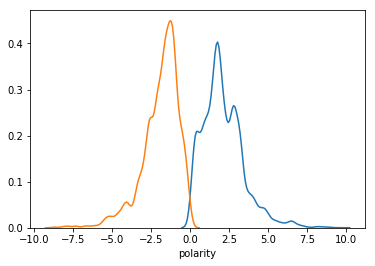

In [18]:
sns.distplot(positive['polarity'], hist=False)
sns.distplot(negative['polarity'], hist=False)
#, full_polarity['dislikes'], hue=full_polarity['category'])

## Aggregating Stats Based On Category

Keep in mind category_id is a nominal variable so we're just looking to see if any discerning factors between the category and their stats as opposed to like a linear relationship or something.

In [19]:
#pull out category and stats
cat_stats = video_data[["category_id", "views", "likes", "dislikes", "comment_count"]]
cat_stats.head()

,category_id,views,likes,dislikes,comment_count
0,22,748374,57527,2966,15954
1,24,2418783,97185,6146,12703
2,23,3191434,146033,5339,8181
3,24,343168,10172,666,2146
4,24,2095731,132235,1989,17518


In [20]:
#group by category
grouped_cat_stats = cat_stats.groupby(["category_id"]).mean().reset_index()

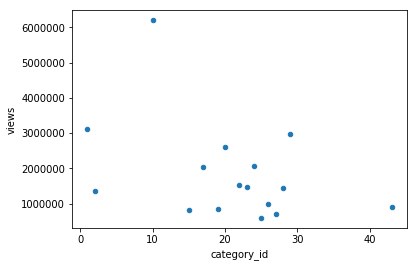

In [21]:
#category vs views
grouped_cat_stats.plot.scatter("category_id","views")

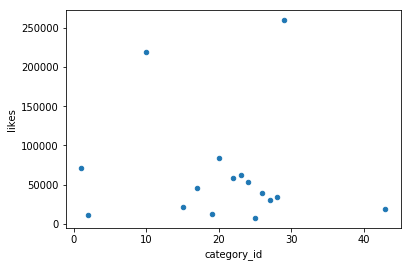

In [22]:
#category vs likes
grouped_cat_stats.plot.scatter("category_id","likes")

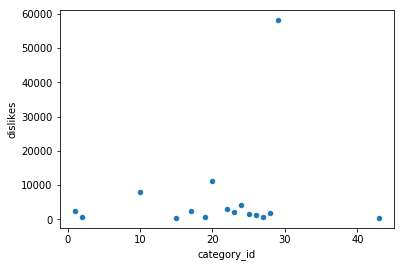

In [23]:
#category vs dislikes
grouped_cat_stats.plot.scatter("category_id","dislikes")

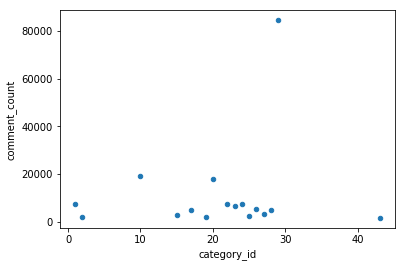

In [24]:
#category vs comment_count
grouped_cat_stats.plot.scatter("category_id","comment_count")

Because we have this blob in the middle with very similar statistics for a lot of different categories, I don't think this may be a feasible idea. let me know if you guys have a solution or something I missed!


## Tags Stuff

In [25]:
import json

category_map = {}
data = {}
with open('dataset/US_category_id.json', 'r') as outfile:
    data = json.load(outfile)
    for item in data["items"]:
        category_map[item["id"]] = item["snippet"]["title"]
    

In [26]:
category_map

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [27]:
tags = video_data["tags"]

In [28]:
len(tags)

40949

In [29]:
tags[1]

'last week tonight trump presidency|"last week tonight donald trump"|"john oliver trump"|"donald trump"'

In [30]:
tags[2]

'racist superman|"rudy"|"mancuso"|"king"|"bach"|"racist"|"superman"|"love"|"rudy mancuso poo bear black white official music video"|"iphone x by pineapple"|"lelepons"|"hannahstocking"|"rudymancuso"|"inanna"|"anwar"|"sarkis"|"shots"|"shotsstudios"|"alesso"|"anitta"|"brazil"|"Getting My Driver\'s License | Lele Pons"'

In [31]:
tags[3]

'rhett and link|"gmm"|"good mythical morning"|"rhett and link good mythical morning"|"good mythical morning rhett and link"|"mythical morning"|"Season 12"|"nickelback lyrics"|"nickelback lyrics real or fake"|"nickelback"|"nickelback songs"|"nickelback song"|"rhett link nickelback"|"gmm nickelback"|"lyrics (website category)"|"nickelback (musical group)"|"rock"|"music"|"lyrics"|"chad kroeger"|"canada"|"music (industry)"|"mythical"|"gmm challenge"|"comedy"|"funny"|"challenge"'

In [32]:
video_data["category_id"][0]

22

In [33]:
tags_df = pd.DataFrame()
tags_df.head()

""


In [34]:
interested_cats = set([1, 17, 28])

In [ ]:
for i in range(len(tags)):
    if i % 10000 == 0:
        print(i)
    category = video_data["category_id"][i]
    if category in interested_cats:
        ls = tags[i]
        individual_tags = ls.split("|")
        for it in individual_tags[0:5]:
            tags_df = tags_df.append({"Tag Name": it, "Category": category}, ignore_index=True)

In [ ]:
tags_df

In [ ]:
grouped_cat_count = tags_df.groupby(["Category"]).count().reset_index()
grouped_cat_count

In [ ]:
grouped_tag_count = tags_df.groupby(["Tag Name"]).count().reset_index()
final_df = grouped_tag_count.sort_values(by=['Category'], ascending=False)
final_df.head()

In [ ]:
len(set(tags_df["Tag Name"]))

In [ ]:
csum = 0
for i in range(len(tags)):
    ls = tags[i]
    individual_tags = ls.split("|")
    csum += len(individual_tags)
#     print(len(individual_tags))
#     print(len(tags_df))
#     category = video_data["category_id"][0]
#     for it in individual_tags:
#         tags_df = tags_df.append({"Tag Name": it, "Category": category}, ignore_index=True)  

In [ ]:
csum